In [11]:
import numpy as np
import cv2
import os
import glob
from os.path import join
import json
import matplotlib.pyplot as plt

In [29]:
path = '00028'

In [31]:
face_file = open(join(path, "appleFace.json"))
left_file = open(join(path, "appleLeftEye.json"))
right_file = open(join(path, "appleRightEye.json"))
dot_file = open(join(path, "dotInfo.json"))
grid_file = open(join(path, "faceGrid.json"))

In [32]:
face_json = json.load(face_file)
left_json = json.load(left_file)
right_json = json.load(right_file)
dot_json = json.load(dot_file)
grid_json = json.load(grid_file)

In [33]:
img_name='00028/00929.jpg'

In [34]:
dir = img_name[:5]

# frame name
frame = img_name[6:]

# index of the frame inside the sequence
idx = int(frame[:-4])

In [35]:
img = cv2.imread(join(path, "frames", frame))

In [36]:
tl_x_face = int(face_json["X"][idx])
tl_y_face = int(face_json["Y"][idx])
w = int(face_json["W"][idx])
h = int(face_json["H"][idx])
br_x = tl_x_face + w
br_y = tl_y_face + h
face = img[tl_y_face:br_y, tl_x_face:br_x]

In [37]:
tl_x = tl_x_face + int(left_json["X"][idx])
tl_y = tl_y_face + int(left_json["Y"][idx])
w = int(left_json["W"][idx])
h = int(left_json["H"][idx])
br_x = tl_x + w
br_y = tl_y + h
left_eye = img[tl_y:br_y, tl_x:br_x]

In [38]:
tl_x = tl_x_face + int(right_json["X"][idx])
tl_y = tl_y_face + int(right_json["Y"][idx])
w = int(right_json["W"][idx])
h = int(right_json["H"][idx])
br_x = tl_x + w
br_y = tl_y + h
right_eye = img[tl_y:br_y, tl_x:br_x]

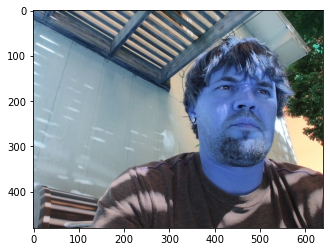

In [41]:
plt.imshow(img)
plt.show()

In [39]:
face_grid = np.zeros(shape=(25, 25, 1), dtype=np.float32)
tl_x = int(grid_json["X"][idx])
tl_y = int(grid_json["Y"][idx])
w = int(grid_json["W"][idx])
h = int(grid_json["H"][idx])
br_x = tl_x + w
br_y = tl_y + h
face_grid[tl_y:br_y, tl_x:br_x, 0] = 1

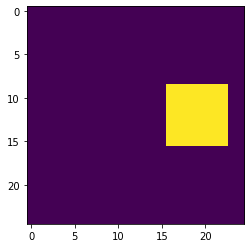

In [40]:
plt.imshow(face_grid)
plt.show()